<a href="https://colab.research.google.com/github/Serendipity-Song/Classify_CIFAR-10_Dataset/blob/main/CIFAR_10_dataset_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 11s 12ms/step - loss: 1.4815 - accuracy: 0.4716 - val_loss: 1.1911 - val_accuracy: 0.5843
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 1.1244 - accuracy: 0.6059 - val_loss: 1.0587 - val_accuracy: 0.6304
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 0.9957 - accuracy: 0.6528 - val_loss: 1.0604 - val_accuracy: 0.6281
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.9173 - accuracy: 0.6803 - val_loss: 0.9368 - val_accuracy: 0.6771
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.8511 - accuracy: 0.7033 - val_loss: 0.9204 - val_accuracy: 0.6822
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.7962 - accuracy: 0.7215 - val_loss: 0.8820 - val_accuracy: 0.6995
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 0.7424 - accuracy: 0.7411 - val_loss: 0.9038 - val_accuracy: 0.696

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.8915 - accuracy: 0.7095
Test accuracy: 0.7095000147819519


313/313 [==============================] - 1s 3ms/step


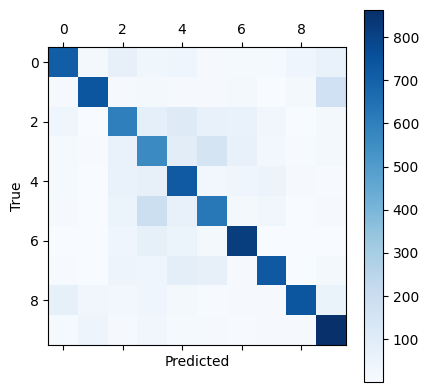

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1000
           1       0.87      0.74      0.80      1000
           2       0.62      0.60      0.61      1000
           3       0.50      0.56      0.53      1000
           4       0.61      0.72      0.66      1000
           5       0.63      0.62      0.63      1000
           6       0.78      0.82      0.80      1000
           7       0.81      0.73      0.77      1000
           8       0.89      0.74      0.81      1000
           9       0.70      0.86      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test data
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(np.argmax(y_test, axis=-1), y_pred))
